In [2]:
import pandas as pd
import numpy as np
import scanpy as sc

In [3]:
import matplotlib.pyplot as plt

In [4]:
from collections import Counter
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [5]:
import os

In [6]:
import matplotlib.gridspec as gridspec

In [7]:
import pickle
with open("../scMulan_marker.pkl", 'rb') as file:
    marker_dict = pickle.load(file)

In [10]:
from collections import Counter

gene_counter = Counter(gene for genes in marker_dict.values() for gene in genes)
genes_to_remove = {gene for gene, count in gene_counter.items() if count > 1}
filtered_marker_dict = {cell_type: tuple(gene for gene in genes if gene not in genes_to_remove)
                        for cell_type, genes in marker_dict.items()}
print(filtered_marker_dict)


{'Monocyte': ('CST3', 'SELENOP', 'TSC22D1', 'RNASE1'), 'Mesothelial cell': ('CD74', 'HLA-DRA'), 'Macrophage': ('DOCK4', 'SLC1A3'), 'Smooth muscle cell': ('NR2F2-AS1', 'PPP1R14A', 'ACTA2', 'MYH11'), 'Pericyte': ('PDZD2', 'MT2A', 'ADIRF', 'SYN3', 'MYL9'), 'Fibroblast': ('DCN', 'LGALS1', 'APOD', 'ABCA8', 'MGP', 'CDH19', 'HLA-E'), 'Myofibroblast': ('FGF14', 'MAML3', 'ZFPM2', 'TNC'), 'Endothelial cell': ('MTRNR2L1', 'SPARCL1', 'MT-ND4L', 'MT-ATP8', 'COX7A1', 'TM4SF1'), 'Capillary endothelial cell': ('CFD', 'MT-CO1'), 'Vascular endothelial cell': ('TSHZ2', 'PCDH15', 'PCDH7', 'MECOM', 'TPM1', 'TPM2'), 'Cardiomyocyte cell': ('CDH13', 'SYNE1'), 'Neuron': ('NRXN3', 'ST6GALNAC5', 'PLCB1', 'VIM'), 'Lymphoid cell': ('MT-ND1', 'PLCL1', 'TRAC', 'CTNNA3', 'MAST4'), 'Memory CD4 T cell': ('SELL', 'RGCC'), 'NK T cell': ('PRF1', 'GNLY', 'CORO1A'), 'T cell': ('BCL11B', 'PITPNC1', 'PCAT1', 'JAML'), 'Cytotoxic CD8 T cell': ('GZMK', 'RGS1', 'JUN'), 'B cell': ('CD37', 'TUBA1B', 'PHACTR1', 'IGHM', 'CD52', 'IGKC

In [11]:
mark_list = []
for key in marker_dict.keys():
    mark_list.extend(filtered_marker_dict[key])

In [14]:
adata = sc.read_h5ad('/nfs/public/cell_gpt_data/dataHub/datasets/datasets/ECA_GO/model_hub/heart_corrected.h5ad')

In [12]:
#unique_mark_list = list(dict.fromkeys(mark_list))
print(mark_list)

['CST3', 'SELENOP', 'TSC22D1', 'RNASE1', 'CD74', 'HLA-DRA', 'DOCK4', 'SLC1A3', 'NR2F2-AS1', 'PPP1R14A', 'ACTA2', 'MYH11', 'PDZD2', 'MT2A', 'ADIRF', 'SYN3', 'MYL9', 'DCN', 'LGALS1', 'APOD', 'ABCA8', 'MGP', 'CDH19', 'HLA-E', 'FGF14', 'MAML3', 'ZFPM2', 'TNC', 'MTRNR2L1', 'SPARCL1', 'MT-ND4L', 'MT-ATP8', 'COX7A1', 'TM4SF1', 'CFD', 'MT-CO1', 'TSHZ2', 'PCDH15', 'PCDH7', 'MECOM', 'TPM1', 'TPM2', 'CDH13', 'SYNE1', 'NRXN3', 'ST6GALNAC5', 'PLCB1', 'VIM', 'MT-ND1', 'PLCL1', 'TRAC', 'CTNNA3', 'MAST4', 'SELL', 'RGCC', 'PRF1', 'GNLY', 'CORO1A', 'BCL11B', 'PITPNC1', 'PCAT1', 'JAML', 'GZMK', 'RGS1', 'JUN', 'CD37', 'TUBA1B', 'PHACTR1', 'IGHM', 'CD52', 'IGKC', 'CD79A']


In [15]:
#adata = adata[adata.obs.cell_type.isin(marker_dict.keys()),unique_mark_list]
adata = adata[adata.obs.cell_type.isin(filtered_marker_dict.keys()),mark_list]

In [16]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.reorder_categories(marker_dict.keys())

/data1/chenyx/anaconda3/envs/Python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.


In [17]:
adata

AnnData object with n_obs × n_vars = 694659 × 72
    obs: 'cell_ID', 'donor_ID', 'donor_gender', 'donor_age', 'original_name', 'organ', 'region', 'subregion', 'sample_status', 'seq_tech', 'cell_type', 'if_patient', 'donor_status', 'treatment', 'ethnicity', 'Ref', 'MCT', 'develop_stage', 'age_bin', 'study_id'
    var: '0'

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize']=(20,8)
plt.rcParams.update({'font.size': 8})
rcParams['figure.dpi']=600

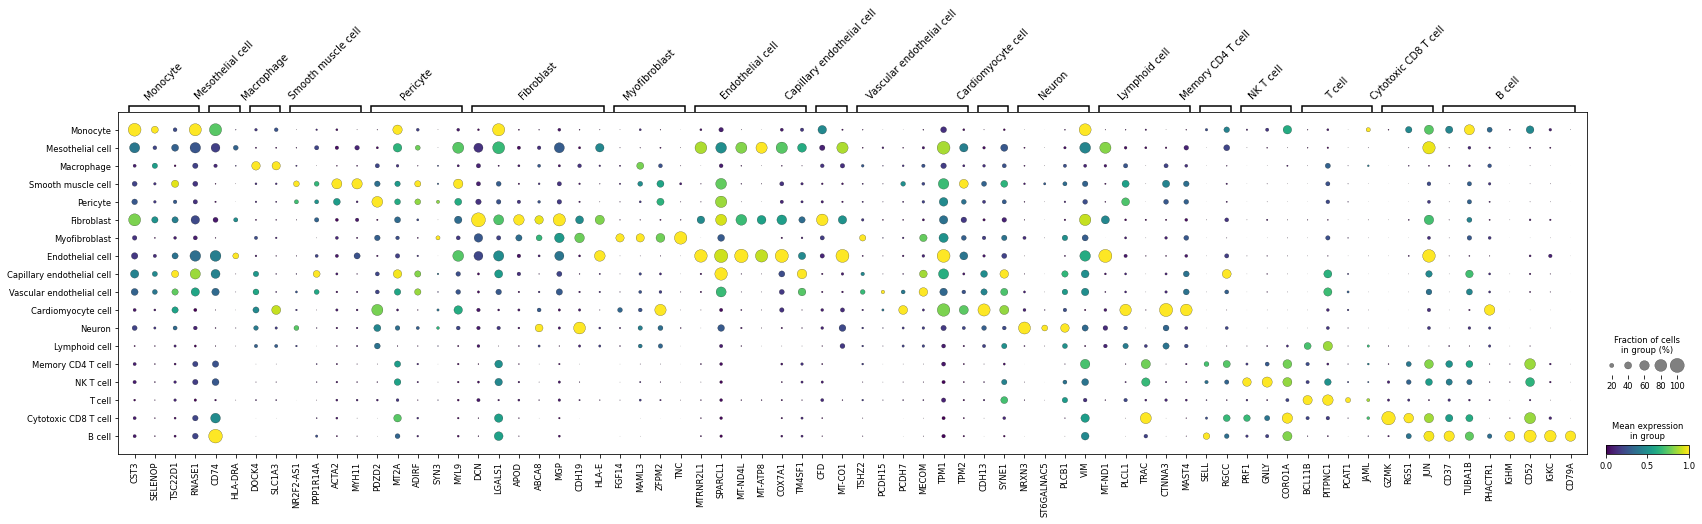

In [19]:
sc.pl.dotplot(adata, filtered_marker_dict, groupby="cell_type", cmap='viridis',standard_scale='var',var_group_rotation=45, save="dotplot_Gene_Dotplot.pdf")